# Analytics

In [1]:
import os
import glob
import psycopg2
import pandas as pd
import numpy as np

conn = psycopg2.connect("host=127.0.0.1 dbname=sparkifydb user=student password=student")
cur = conn.cursor()
conn.set_session(autocommit=True)

In [2]:
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.json'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files

In [3]:
datapath = os.path.normcase(os.getcwd()) + '/data/log_data'
log_files = get_files(datapath)
filepath = log_files[0]
df = pd.read_json(filepath, lines=True)

## Which songs are users listening to the most (Top15)

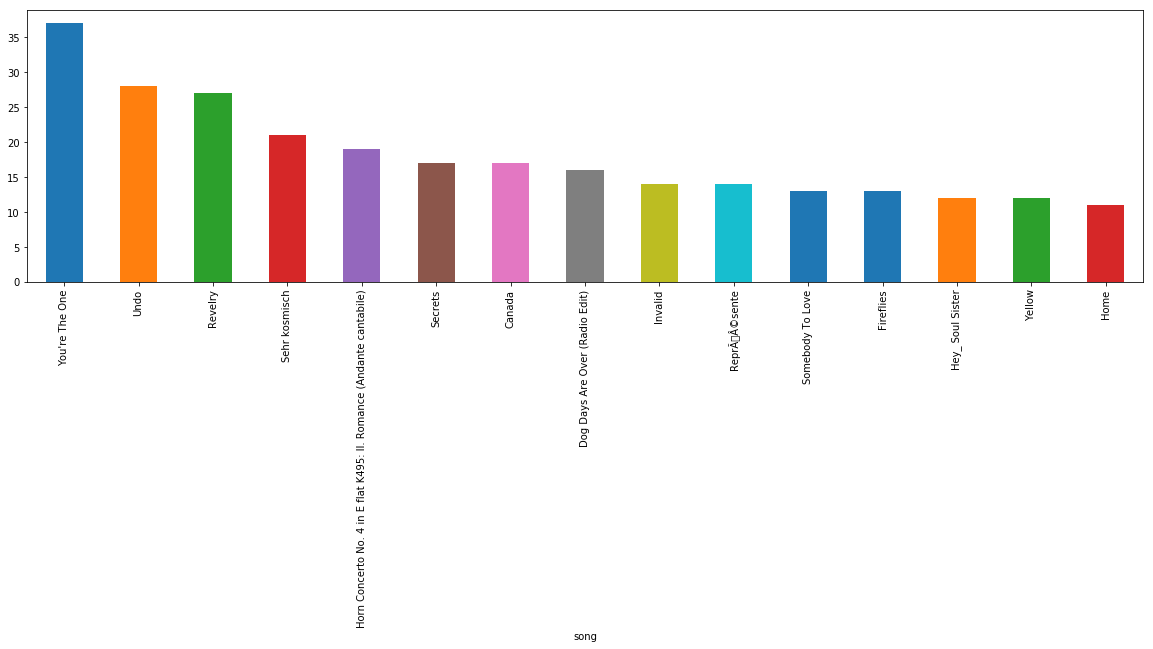

In [5]:
df = pd.read_sql("""SELECT artist, song, COUNT(song) as users FROM songplays GROUP BY song, artist ORDER BY COUNT(song) DESC LIMIT 15""", conn)
df.plot(x='song', y='users', kind='bar', legend=False, figsize=(20,5))

## When are most users active during the day

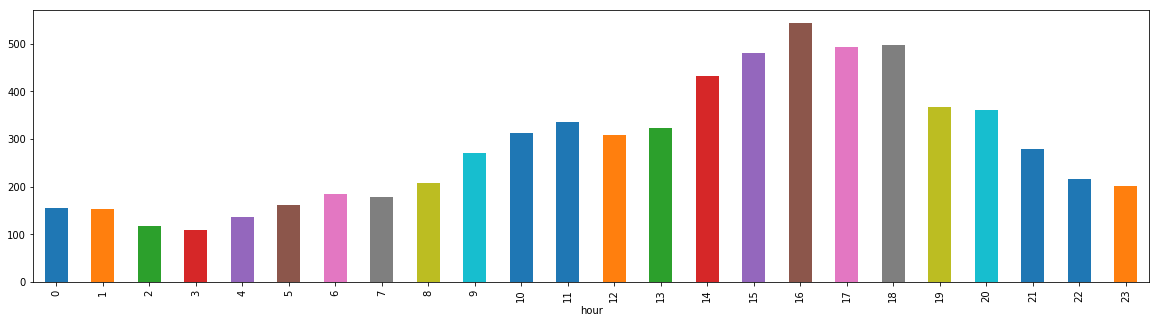

In [6]:
df = pd.read_sql("""SELECT COUNT(hour) as users, hour FROM songplays g INNER JOIN time h ON g.start_time = h.start_time GROUP BY hour ORDER BY hour""", conn)
df.plot(x='hour', y='users', kind='bar', legend=False, figsize=(20,5))

## When are most users active during the month

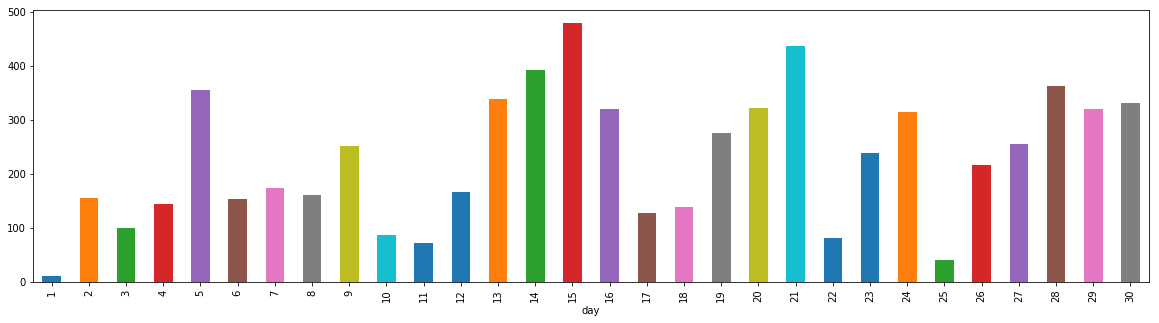

In [7]:
df = pd.read_sql("""SELECT COUNT(day) as users, day FROM songplays g INNER JOIN time h ON g.start_time = h.start_time GROUP BY day ORDER BY day""", conn)
df.plot(x='day', y='users', kind='bar', legend=False, figsize=(20,5))

## Where are most users from (Top20)

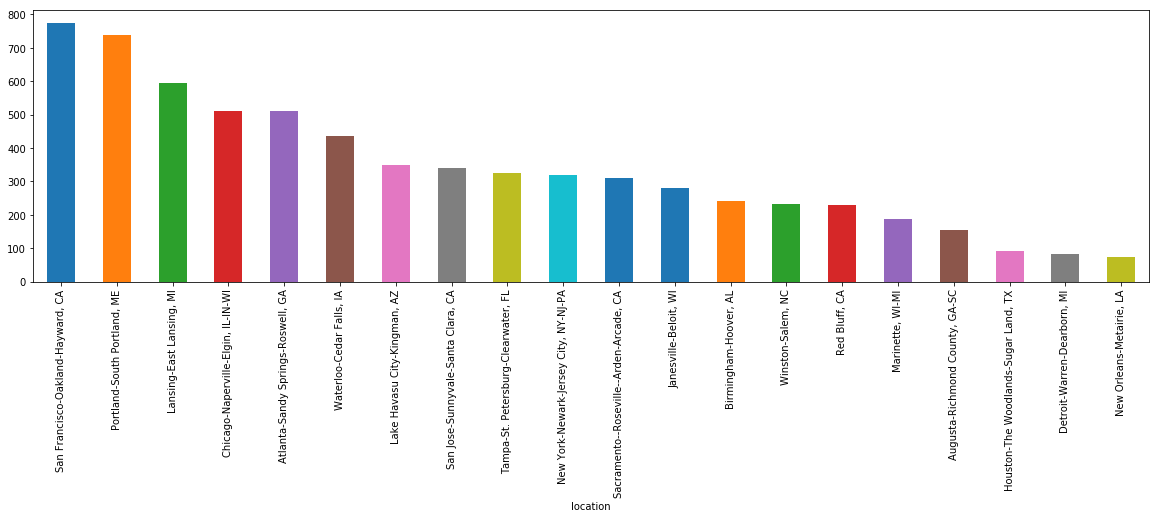

In [8]:
df = pd.read_sql("""SELECT COUNT(location) as users, location FROM songplays GROUP BY location ORDER BY COUNT(location) DESC LIMIT 20""", conn)
df.plot(x='location', y='users', kind='bar', legend=False, figsize=(20,5))

## How many paying users

,users,level
0,1669,free
1,6083,paid


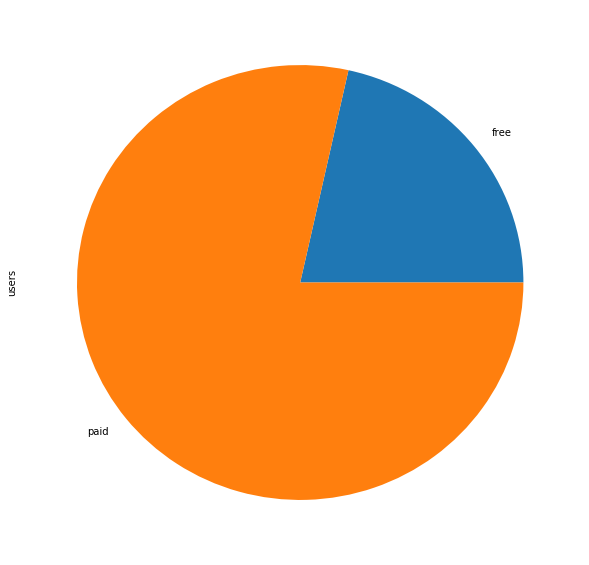

In [9]:
df = pd.read_sql("""SELECT COUNT(level) as users, level FROM songplays GROUP BY level ORDER BY level""", conn)
df.plot(x='level', y='users', kind='pie',labels=['free', 'paid'],  legend=False, figsize=(10,10))
df.head()